### MAP556, Ecole Polytechnique, 2023-24

# TP 2 - Variance Reduction

We have a model defined by the relationship $Y = f(X)$.
The objective is to estimate the value $\mathbb{E}\bigl[g(Y)\bigl]$, for a certain function $g$ over the set of outputs $Y$. We assume that $g(Y)$ is square-integrable.

Exercise 1. Control Variables
Black-box models representing input-output systems of numerical codes are often computationally expensive. Let's suppose we have a reduced input-output model $Y_r = f_r(X)$ that is easier to simulate for different input values $X$ than the model $Y = f(X)$, and so that we know the quantity $m_r = \mathbb{E}\bigl[g(Y_r)\bigl]$. Furthermore, we assume $\mathbb{E}\bigl[g(Y_r)^2\bigl]<\infty$.

We denote $(X_i)_{1\leq i\leq n}$ as a sequence of independent copies of the input variable $X$, and we define
\begin{eqnarray*}
 I_n&=&\frac{1}{n}\sum_{i=1}^n g(f(X_i)),\qquad
 I_n^c = m_r+\frac{1}{n}\sum_{i=1}^n \bigl( g(f(X_i)) - g(f_r(X_i)) \bigr) .
 \end{eqnarray*}

####  Question 1:
Verify that $I_n$ and $I_n^c$ are unbiased estimators of $\mathbb{E}\bigl[g(Y)\bigl]$, and calculate their variances.

We have that


$$ 
\mathbb{E}(I_N) = \frac{1}{n}\sum_{i=1}^n\mathbb{E}(g(f(X_i))) =\frac{1}{n} n \mathbb{E}(g(f(X))) = \mathbb{E}(g(f(X))) = \mathbb{E}(g(Y))
$$
so  we have
$$
\mathbb{E}(I_N)=\mathbb{E}(g(Y))
$$

In the other side we have:

$$
\mathbb{E}(I_N^c) = \mathbb{E}(m_r) + \frac{1}{n}\sum_{i=1}^n \mathbb{E}(g(f(X_i))-g(f_r(X_i))) = m_r + \mathbb{E}(g(Y)) - m_r = \mathbb{E}(g(Y))
$$
so  we have
$$
\mathbb{E}(I_N^c) =  \mathbb{E}(g(Y))
$$

We can conclude that $I_n$ and $I_n^c$ are unbiased estimators of $\mathbb{E}\bigl[g(Y)\bigl]$

Let's calculate their variances

We have:
$$
\mathbb{Var}(I_N)=\mathbb{Var}(\frac{1}{n}\sum_{i=1}^n (g(f(X_i))))=  \frac{1}{n^2}\sum_{i=1}^n \mathbb{Var}(g(f(X_i)))\\
 \mathbb{Var}(I_N)  =\frac{\mathbb{Var}(g(Y))}{n}
$$

Then we have:
$$
\mathbb{Var}(I_N^c) = \mathbb{Var} (\frac{1}{n}\sum_{i=1}^n (g(f(X_i)) - g(f_r(X_i)))) =\frac{1}{n^2}\sum_{i=1}^n \mathbb{Var}(g(f(X_i))-g(f_r(X_i)))\\
 \mathbb{Var}(I_N^c)=\frac{\mathbb{Var}(g(Y) - g(Y_r))}{n}
$$

#### Question 2:

Assuming that the input variables $X$ follow a uniform distribution on $[0,1]$, $f(x)=e^x$, $f_r(x)=1+x$, and $g(y)=y$.

Simulate both estimators and their asymptotic 95% confidence intervals.

Plot the curves of the empirical means $I_n$ and $I_n^c$.

What is the gain in terms of the number of simulations for the estimator $I_n^c$ to achieve the same asymptotic precision as the naive Monte Carlo method?

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [37]:
N = 1000 # Sample size

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

############################################
# Calculate the exact value of m_r
m_r = 1.5 #après calcul
############################################

############################################
# Simulate N samples of values of Y and Y_control
Y = np.exp(np.random.uniform(0, 1, N))
Y_control = 1 + np.random.uniform(0, 1, N)
############################################

############################################
# Calculate both estimators and their 
# empirical variances
############################################
Mean_MC = np.mean(Y)
Variance_MC = np.var(Y)

Mean_control = m_r + np.mean(np.exp(Y_control - 1) - Y_control)
Variance_control = np.var(np.exp(Y_control - 1) - Y_control)

halfWidthCI95_MC = 1.96 * np.sqrt(Variance_MC / N)
halfWidthCI95_Control =  1.96 * np.sqrt(Variance_control / N)

############################################
# Gain in terms of number of simulations
# for the same precision

control_gain = Variance_MC/Variance_control
############################################

############################################
# For display: exact value of E[g(Y)]
Esp_gY = np.exp(1.)-1.

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f emp variance = %1.3f"
%(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.3f empirical variance = %1.3f"
%(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n"
%(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)


Sample size = 1000
Esp_gY = 1.718 

MC Estimator: mean = 1.743 emp variance = 0.243
CI(95%) = [1.713,1.774] 

Control Estimator: mean = 1.714 empirical variance = 0.043
CI(95%) = [1.701,1.727] 

Gain in number of simulations with control variable: 5.72


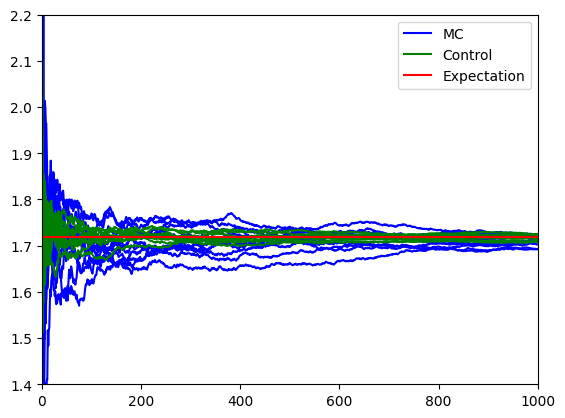

In [38]:
############################################
## Displaying 10 trajectories 
############################################

# Simulating 10 trajectories of the estimators
# I_n and I_n^c
# Expected size of the arrays: M x N
M = 10

Y = np.exp(np.random.uniform(size=(M, N)))
Y_control = 1 + np.random.uniform(size=(M, N))
I_n = np.cumsum(Y, axis=1)/integers1toN
integers1toN=np.arange(1,N+1)
Ic_n = m_r + np.cumsum(np.exp(Y_control - 1) - Y_control, axis=1) / integers1toN  #retrancher 1 pour revenir a des uniformes

## Display the 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

#### Question 3:

Let $(I^j_n)_{1\leq i\leq M}$ and $(I^{c,j}_n)_{1\leq i\leq M}$ be the empirical estimations associated with $M$ independent draws of the two estimators.

Explicitly evaluate $m = \mathbb{E}\bigl[g(Y)\bigl]$ and plot histograms of the errors $(I^j_n - m)_{1 \le j \le M}$ and $(I^{c,j}_n - m)_{1 \le j \le M}$.

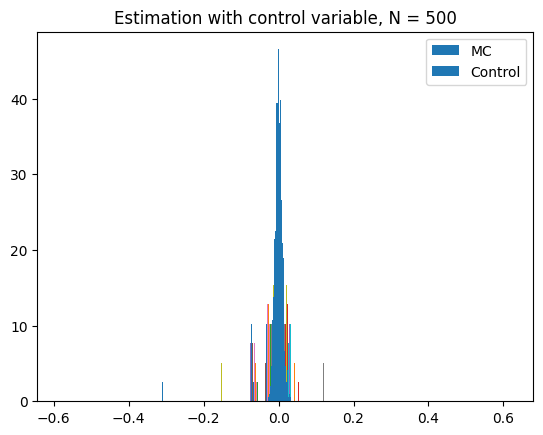

In [39]:
N = 500 # Sample size
M = 1000 # Number of estimator draws

integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.exp(1.)-1.
m_r = 1.5

###############
# Simulate the samples of values of Y 
# and Y_control

Y = np.exp(np.random.uniform(size=(M, N)))
Y_control = 1 + np.random.uniform(size=(M, N))

###############

############################################
# Samples of size M for both estimators

I_N = np.mean(Y,axis=1)
Ic_N = m_r + np.mean(np.exp(Y_control-1) -Y_control, axis=1)

############################################
## Displaying histograms of errors
## for both estimators

plt.hist(I_n-Esp_gY, density="True", bins=int(np.sqrt(M)), label="MC")
plt.hist(Ic_N-Esp_gY, density="True", bins=int(np.sqrt(M)), label="Control")
plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()


#### Question 4: Optimal Control Variable

Now, let's consider the estimator
\begin{eqnarray*}
I_n^\lambda = \lambda  m_r + \frac{1}{n}\sum_{i=1}^n \bigl(g(f(X_i)) - \lambda  g(f_r(X_i))\bigr),
\qquad \lambda \in \mathbb R.
\end{eqnarray*}

Suggest a choice for the parameter $\lambda$.

Plot the trajectories of the empirical means $I_n^\lambda$ obtained with this choice, and then plot the histogram of the errors of this estimator.

In [40]:
############################################
## Estimating optimal lambda from a small
## number of simulations
############################################
n = 100
X = np.random.rand(n)
Y = np.exp(X)

## Empirical optimal lambda


lambda_opt= np.cov(Y,  1 + X)[0, 1] /np.var( 1 + X)

print("Optimal lambda = %1.3f" %lambda_opt)


Optimal lambda = 1.704


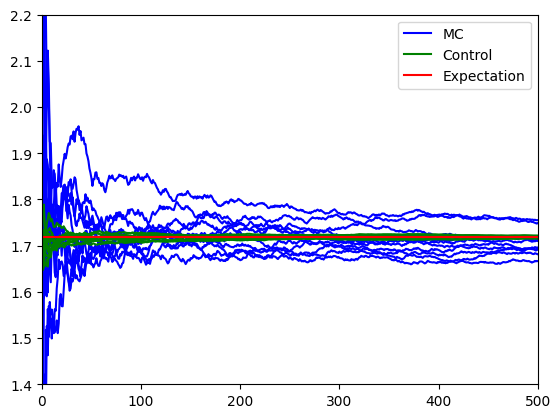

In [41]:
#############################################
### For histograms: M x N draws
#############################################
M = 1000
N = 500
integers1toN = np.arange(1,N+1)

Y = np.exp(np.random.uniform(size=(M, N)))
Y_control = 1 + np.random.uniform(size=(M, N))

#############################################
### Displaying the first 10 trajectories
#############################################

I_n = np.cumsum(Y[0:10,:], axis=1) / integers1toN
Ic_n = np.cumsum( (np.exp(Y_control-1) - lambda_opt*Y_control)[0:10,:], axis=1) / integers1toN +lambda_opt*m_r

## Display the first 10 trajectories
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(integers1toN, I_n[0], color="b", label="MC")
ax.plot(integers1toN, I_n[1:].T, color="b")

ax.plot(integers1toN, Ic_n[0], color="g", label="Control")
ax.plot(integers1toN, Ic_n[1:].T, color="g")
ax.axhline(Esp_gY, color="r", label="Expectation")

ax.set_xlim(0, N)
ax.set_ylim(1.4, 2.2)
ax.legend(loc="best")
plt.show()

In [52]:

############################################
# Calculate both estimators I_N and I_N control and their
# empirical variances
Mean_MC = np.mean(np.mean(Y, axis=1))
Variance_MC = np.var(np.mean(Y, axis=1)) * N

# Calculate the control estimator with antithetic sampling
control_estimates = lambda_opt * m_r + np.mean(np.exp(Y_control - 1) - lambda_opt * Y_control, axis=1)
Mean_control = np.mean(control_estimates)
Variance_control = np.var(control_estimates) * N


halfWidthCI95_MC = np.sqrt(Variance_MC / N)*1.96
halfWidthCI95_Control = np.sqrt(Variance_control / N)*1.96

control_gain = Variance_MC/Variance_control

print("Sample size = %d" %N)
print("Esp_gY = %1.3f \n" %Esp_gY)
print("MC Estimator: mean = %1.3f  empirical variance = %1.3f" \
      %(Mean_MC, Variance_MC))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_MC-halfWidthCI95_MC, Mean_MC+halfWidthCI95_MC))

print("Control Estimator: mean = %1.4f  empirical variance = %1.3f" \
      %(Mean_control, Variance_control))
print("CI(95%%) = [%1.3f,%1.3f] \n" \
      %(Mean_control-halfWidthCI95_Control, Mean_control+halfWidthCI95_Control))

print("Gain in number of simulations with control variable: %1.2f" %control_gain)



Sample size = 500
Esp_gY = 1.718 

MC Estimator: mean = 1.718  empirical variance = 0.262
CI(95%) = [1.673,1.763] 

Control Estimator: mean = 1.7182  empirical variance = 0.004
CI(95%) = [1.713,1.724] 

Gain in number of simulations with control variable: 69.54


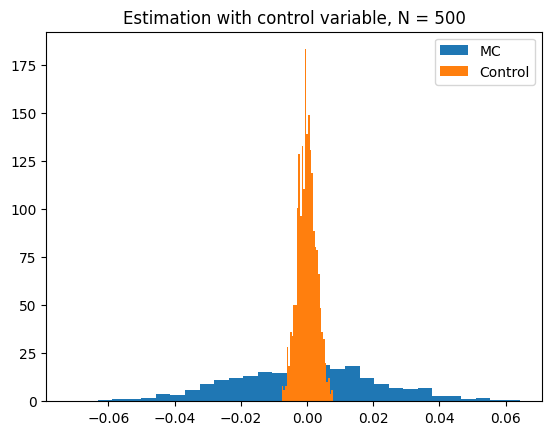

In [44]:
#############################################
### For the histogramms: evaluate the 
## errors for both estimators I_N and I_N control
#############################################

# Calculate the errors for the MC estimator
error_N = np.mean(Y, axis=1) - Esp_gY

# Calculate the errors for the control estimator with antithetic sampling
control_estimates = lambda_opt * m_r + np.mean(np.exp(Y_control - 1) - lambda_opt * Y_control, axis=1)
error_control_N = control_estimates - Esp_gY


plt.hist(error_N, density="True", bins=int(np.sqrt(M)), label="MC")

plt.hist(error_control_N, density="True", bins=int(np.sqrt(M)), label="Control")

plt.title("Estimation with control variable, N = %1.0f" %N)

plt.legend(loc="best")
plt.show()

### Exercise 2. Antithetic Sampling and Stratification Methods
We assume that the input variables $X$ follow a uniform distribution between $-1$ and $+1$. We are in the situation where $f(x)=e^x$, and $g(y)=y$, and we want to estimate $\mathbb{E}\bigl[g(Y)\bigl]= \mathbb{E}\bigl[e^X\bigl]$.


#### Question 1: Basic Monte Carlo Method

Let $I_n$ be the empirical mean of $n$ independent copies of $X$.

Verify that we have $\mathbb{E}\bigl[e^X\bigl] = \sinh(1)\simeq 1.18$, and $\mbox{Var}(e^X)= \frac{1}{2} (1-e^{-2})\simeq 0.43$.

Plot the curves of the empirical means obtained from multiple realizations and compare them with the desired quantity.





In [ ]:
# Constants to be used for the rest of the exercise

N = 1000 # Sample size
integers1toN = np.arange(1,N+1) # A vector containing integers from 1 to N

Esp_gY = np.sinh(1.0)
Var_gY = (1.0 - np.exp(-2.))/2.

In [ ]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and draws of Y = exp(X)
X = np.random.uniform(-1,1,1000)
Y = np.exp(X)
############################################

############################################
# Store in 'mean' the MC estimation of E[g(Y)],
# in 'var' the empirical variance, and in 'halfWidthCI'
# the half width of the asymptotic 95% confidence interval for E[g(Y)]

mean = np.mean(Y)
var = np.var(Y)
halfWidthCI = 1.96 * np.sqrt(var / N)
############################################

print("MC Estimator \n")

print("Esp_gY = %1.3f Var_gY = %1.3f" %(Esp_gY, Var_gY))
print("mean = %1.3f  var = %1.3f" %(mean,var))
print("95%% confidence interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))



MC Estimator 

Esp_gY = 1.175 Var_gY = 0.432
mean = 1.167  var = 0.417
95% confidence interval for E[g(Y)] = [ 1.127 , 1.208 ] 

Relative error = 0.034


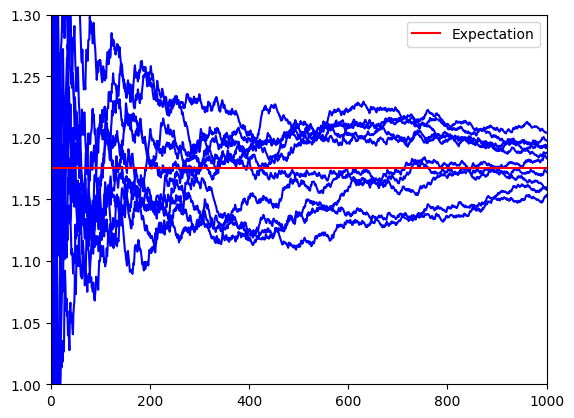

In [ ]:
M = 10 # number of realizations of empirical means

############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1,1,(M,N))
Y = np.exp(X)
I_n =  np.cumsum(Y,axis=1)/integers1toN
############################################

# Displaying trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


#### Question 2: Antithetic Sampling

Verify that $(f(u)-f(v))(f(-u)-f(-v))\leq 0$, for all $(u,v)\in [-1,1]$, and deduce a antithetic sampling technique based on simulating $n$ uniform variables on $[-1,1]$.

Let $I^{\prime}_n$ be the corresponding empirical estimator.

Plot the curves of the empirical means obtained.

What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

In [54]:
############################################
# Complete with N draws from the uniform distribution [-1,1]
# and antithetic draws
X = np.random.uniform(-1, 1, N)
Z = -X 
#
############################################
Y = np.exp(X)
Y_antithetic = np.exp(Z)
In_ant= (Y+Y_antithetic)/2
############################################
# Complete with the calculation of the antithetic estimator
mean = np.mean(In_ant)
var = np.var(In_ant) * N
halfWidthCI = np.sqrt(var / N) * 1.96
############################################

print("Antithetic Estimator \n")

print("Esp_gY = %1.3f" %(Esp_gY))
print("I_prime_mean = %1.3f  empirical variance = %1.3f" %(mean, var))
print("95%% Confidence Interval for E[g(Y)] = [ %1.3f , %1.3f ] \n" %(mean - halfWidthCI, mean + halfWidthCI))
print("Relative error = %1.3f" %(halfWidthCI/mean))
print("gain in number of simulations compared to MC: %1.2f" %(Var_gY/var))



Antithetic Estimator 

Esp_gY = 1.718
I_prime_mean = 1.169  empirical variance = 12.269
95% Confidence Interval for E[g(Y)] = [ 0.862 , 1.476 ] 

Relative error = 0.263
gain in number of simulations compared to MC: 0.04


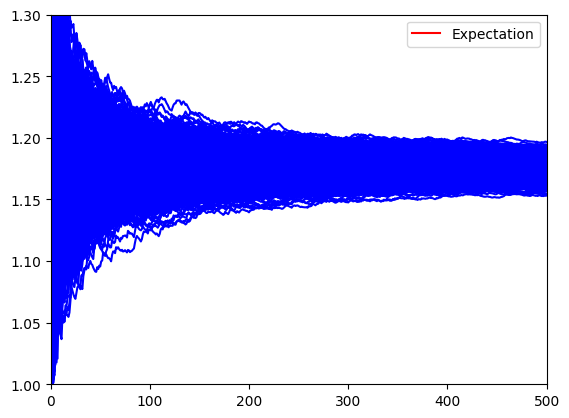

In [60]:
############################################
## Empirical mean trajectories
############################################

############################################
# Evaluate M trajectories of the empirical estimator I'_n
X = np.random.uniform(-1, 1, (M,N))
Z = -X 
Y = np.exp(X)
Y_antithetic = np.exp(Z)
############################################
# Complete with the calculation of
# antithetic estimator trajectories
I_prime_n = np.cumsum((Y + Y_antithetic) / 2, axis=1) / integers1toN
############################################

# Displaying the estimator trajectories
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_prime_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


#### Question 3: Proportional Stratification
Propose a proportional stratification technique based on simulating uniform variables on $[-1,0]$ and uniform variables on $[0,1]$.

Let $J_n$ be the corresponding estimator. Plot the estimator trajectories as a function of $n$. Does this estimator satisfy the Central Limit Theorem (CLT)? What is the gain in terms of the number of simulations for this estimator, for the same asymptotic accuracy as the naive Monte Carlo method?

Can we explicitly calculate $\mbox{Var}(J_n)$? (see question 5)

In [ ]:
# Proportionnal stratification (we will take N even)
N1 = int(N/2)
N2 = N1

############################################
# Complete with N1 and N2 draws of conditional distributions
# on strata
X1 = ?
X2 = ?
############################################

############################################
# Stratified estimator
J_N = ????

############################################
# We evaluate the asymptotic variance through simulation
# of the estimator J_N
############################################

var = ????

halfWidthCI = 1.96 * np.sqrt(var / N)  # because J_N satisfies a CLT
relativeError = halfWidthCI / J_N

#######
print("Estimator by proportionnal stratification \n")

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" %(Esp_gY, Var_gY))
print("J_N = %1.3f Estimated Variance  = %1.3f" %(J_N, var))
print("CI = [%1.3f,%1.3f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))
print("Relative Error = %1.3f" %relativeError)

print("Savings in the number of simulations compared to MC: %1.2f" %(Var_gY/var))


In [ ]:
############################################
## Trajectories of the stratified estimator J_n
## for n = 2, 4, ..., N
############################################
M = int(10)

############################################
# Complete with M x N1 and M x N2 draw
# of the conditionnal laws on strata
X1 = ?????
X2 = ?????
############################################

J_n = np.zeros((M, int(N/2)))

############################################
# Complete with the calculus of the stratified
# estimator for n@ 2,4,...,N

for n in np.arange(2, N+2, 2):
    n1 = n // 2
    J_n[:, n1-1] = ????

############################################
# Displaying the trajectories of the stratified estimator
## for n = 2, 4, ..., N

evenIntegers1toN = np.arange(2, N+2, 2)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(evenIntegers1toN, J_n[1:10, :].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()


#### Question 4: Non-Proportional Stratification (Optional)

Propose a stratification technique based on simulating a proportion $n_1=rn$ of uniform variables on $[-1,0]$, and $n_2=(1-r)n$ of uniform variables on $[0,1]$, with $r \in (0,1)$ such that $n_1$ and $n_2$ are integers.

Plot the trajectories of these estimators as a function of $n$ for various values of $r$.

In [ ]:
# Non-Proportional Stratification

def nonProportionalStratification(r):
    N1 = int(N * r)
    N2 = int(N - N1)
    
    ################
    # Complete with N1 and N2 draws
    # of conditional distributions on strata
    X1 = ????
    X2 = ????
    ################
    
    ################
    # Stratified estimator
    J_N = ????
    
    ############################################################
    # Evaluate the variance of the estimator J_N through simulation
    var = ????
    
    halfWidthCI = 1.96 * np.sqrt(var)
    
    relativeError = halfWidthCI / J_N
    
    print("Non-Proportional Stratification Estimator, r = %1.2f \n" %r)
    
    print("E[g(Y)] = %1.4f Var[g(Y)] = %1.4f" %(Esp_gY, Var_gY))
    print("J_N = %1.4f  var*N = %1.4f" %(J_N, var))
    print("CI = [%1.4f,%1.4f] \n" %(J_N - halfWidthCI, J_N + halfWidthCI))
    
    print("Relative Error = %1.4f" %relativeError)
    print("Savings in the number of simulations compared to MC : %1.4f" %(Var_gY/var))
    
    ############################################
    ## Trajectories of the stratified estimator for n=1,..,N
    ############################################
    M = 10
    
    #####################
    # Complete with M x N1 and M x N2 draws
    # of conditionnal laws on strata
    #X1 = ?????
    #X2 = ?????
    
    Y1 = np.exp(X1); Y2 = np.exp(X2)
    
    J_n = np.zeros((M, N))
    
    #####################
    # Complete with the calculus of the stratified
    # estimator for different values of n
    for n in np.arange(int(1/r), N):
        n1 = int(n * r)
        n2 = n - n1
        J_n[:, n] = ????
        
    ############################################
    # Display the trajectories
    integers1toN = np.arange(1, N+1)
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(integers1toN, J_n[1:10, :].T, color="b")
    
    ax.set_ylim(1.0, 1.3)
    ax.axhline(Esp_gY, color="r", label="Expectation")
    ax.legend(loc="best")
    plt.show()

#nonProportionalStratification(0.8)
#nonProportionalStratification(0.4)
#nonProportionalStratification(0.2)


####  Question 5: Optimal stratification on both strata$(S_1,S_2)=([-1,0],[0,1])$ (Optional)

Calculate the values of the parameters
\begin{eqnarray*}
\sigma_1^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[-1,0]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[-1,0]\bigl]^2\\
\sigma_2^2&:=&\mathbb{E}\bigl[e^{2X}~|~X\in[0,1]\bigl] - \mathbb{E}\bigl[e^{X}~|~X\in[0,1]\bigl]^2
\end{eqnarray*}
and propose an optimal stratification technique.
Simulate the empirical estomator associated and plot its trajectories.


In [ ]:
## Explicit Calculation of sigma_1 and sigma_2
sigma_1 = np.sqrt(0.5 * (1. - np.exp(-2.)) - (1. - np.exp(-1.))**2)
sigma_2 = np.sqrt(0.5 * (np.exp(2.) - 1.) - (np.exp(1.) - 1.)**2)

############################################
## Compute the optimal N1
#r = ????

N1 = int(N * r)
N2 = int(N - N1)

############################################
## Simulation of the non-proportional 
## stratification estimator with optimal N1
##
## This is the same code as in Question 4: we could directly call
## the nonProportionalStratification(r) function
## The only difference in the code below is that we use
## the explicit variance of the stratified estimator instead of estimating it.
#X1 = ????
#X2 = ????

############################################
# Stratified estimator

#J_N = ????

############################################
## Compute the variance of the optimal J_N estimator
## We can use the explicit expression of the variance of J_N
#var = ?????


halfWidthCI = 1.96 * np.sqrt(theoretical_variance / N)
relativeError = halfWidthCI / J_N

############################################
print("Estimator by optimal non-proportional stratification, r_optimal = %1.3f" % r)

print("E[g(Y)] = %1.3f Var[g(Y)] = %1.3f" % (Esp_gY, Var_gY))
print("J_mean = %1.3f  theoretical_variance = %1.3f" % (J_N, var))
print("CI = [%1.3f,%1.3f] \n" % (J_N - halfWidthCI, J_N + halfWidthCI))

print("Relative Error = %1.3f" % relativeError)
print("Savings in the number of simulations compared to MC: %1.2f" % (Var_gY / var))


In [ ]:
############################################
# Complete the trajectories of the stratified estimator
# for n = 1, .., N
J_n = np.zeros((M, N))

for n in np.arange(int(1 / r), N):
    n1 = int(n * r)
    n2 = n - n1
    J_n[:, n] = ????

############################################
# Displaying the trajectories
integers1toN = np.arange(1, N + 1)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n[1:10, :].T, color="b")

ax.set_ylim(1.0, 1.3)
ax.axhline(Esp_gY, color="r", label="Expectation")
ax.legend(loc="best")
plt.show()
